In [ ]:
#This scripts analyses the RMSD's differences, inter-cluster RMSD, for all clusters coming from a GROMACS gromos clustering analysis, it takes both documentation and ChatGPT refinement for the RMSD computation
#The useful documentation is stated in the comments throughout the script
#Examples of the plots generated using this code are left intentionally, not to be used

In [ ]:
# MIT License
# Copyright (c) 2025 Rodolfo Adrian Arriaga Rivera
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction.
# See the LICENSE file for full license text.

In [3]:
#Importing necessary libraries
import MDAnalysis as mda
from MDAnalysis.analysis import align
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Setting working directory
import os
os.chdir('/path/to/working/directory')
print(os.getcwd())

/Volumes/ADATA HV 30/ifit5/ppp-mg/clustering_0.3


In [ ]:
from MDAnalysis import Universe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading clustered model result PDB of the clustering analysis from GROMACS using gromos algorithm
u =  mda.Universe('/path/to/pbd/.pdb', format='PDB')

# Getting each PBD model
selection = "(name CA) or (resname ligand)"
sel = u.select_atoms(selection)

# Storing the coordinates for each model in an object named coordinates, and saving each model's coordinates
coordinates = []

for ts in u.trajectory:
    sel = u.select_atoms(selection)
    coordinates.append(sel.positions.copy())

#Checking coordinates size and creating a rmsd matrix size n by n, according to the coordinates of each model
n_models = len(coordinates)
rmsd_matrix = np.zeros((n_models, n_models))

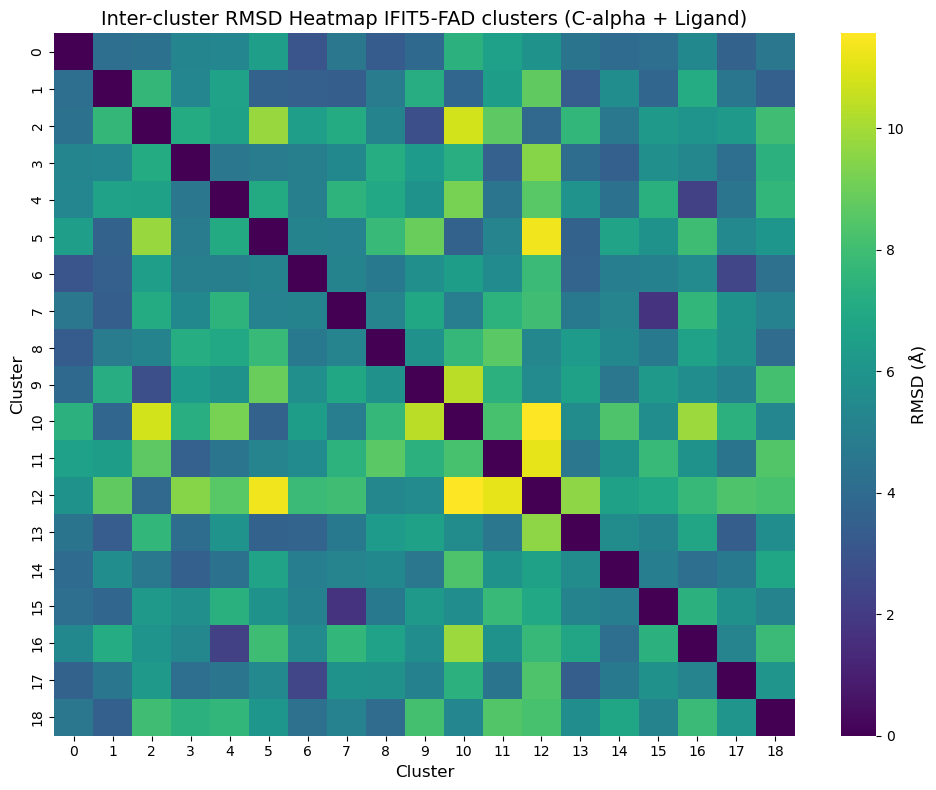

In [ ]:
# Computing RMSD between all pairs, according to Oliver Beckstein, David L. Dotson, John Detlefs; Calculating root mean square quantities — MDAnalysis.analysis.rms
for i in range(n_models):
    for j in range(n_models):
        ref_coords = coordinates[i]
        mob_coords = coordinates[j]
        if ref_coords.shape != mob_coords.shape:
            print(f"Warning: Shape mismatch between model {i} and model {j}")
            continue
        diff = ref_coords - mob_coords
        rmsd = np.sqrt((diff ** 2).sum(axis=1).mean())
        rmsd_matrix[i, j] = rmsd

#Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(rmsd_matrix, cmap='viridis', xticklabels=True, yticklabels=True)

# Set title and labels
plt.title("Inter-cluster RMSD Heatmap protein-ligand clusters (C-alpha + Ligand)", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Cluster", fontsize=12)

# Setting the colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label('RMSD (Å)', fontsize=12)

# Save and display the plot
plt.tight_layout()
plt.savefig(".png", dpi=300)
plt.show()

In [ ]:
#Parser for extracting members and %frames in the clustering analyses

In [ ]:
import pandas as pd

logfile = '.log' #log file which contains members, cluster, centroids, also generated by gromacs clustering tool
clusters = []
total_members = 0
reading_table = False

with open(logfile, 'r') as f:
    for line in f:
        # Look for the table header to start parsing
        if line.strip().startswith('cl.'):
            reading_table = True
            continue  # Skip the header line itself
        
        if reading_table:
            # Skip empty lines or continuation lines (like the "| | |" ones)
            if line.strip() == '' or line.strip().startswith('|'):
                continue

            parts = line.strip().split('|')
            if len(parts) < 3:
                continue  # Skip weird lines

            # Cluster ID (first part)
            cluster_id = int(parts[0].strip())

            # Members count (from the 2nd part)
            members_info = parts[1].strip().split()  # e.g., ['11629', '0.295']
            members = int(members_info[0])

            # Centroid frame (from the 3rd part)
            centroid_info = parts[2].strip().split()  # e.g., ['76130', '.243']
            centroid_frame = int(centroid_info[0])

            clusters.append({
                'Cluster ID': cluster_id,
                'Members': members,
                'Centroid Frame': centroid_frame
            })

            total_members += members

# Add percentage
for c in clusters:
    c['Percentage (%)'] = round((c['Members'] / total_members) * 100, 2)

# Create dataframe
df = pd.DataFrame(clusters)

# Save to CSV
df.to_csv('clustering_summary.csv', index=False)

print(df)

   Cluster ID  Members  Centroid Frame  Percentage (%)
0           1    12127           81990           60.63
1           2     4836          172500           24.18
2           3     2960           14360           14.80
3           4       34          113490            0.17
4           5       29          190580            0.14
5           6        8           27040            0.04
6           7        4              20            0.02
7           8        2          190490            0.01
8           9        1           67200            0.00
